In [3]:
import networkx as nx
import numpy as np
import scipy.sparse as sparse
from scipy.sparse import linalg
import matplotlib.pyplot as plt

class Graph:
    def __init__ (self, graph):
        """
        Parameters
        ----------
        graph -- a NetworkX graph
    
        """
        self.graph = graph
        self.nodes = graph.nodes()
        self.edgelist = graph.edges()
        self.S_Lap = None       # A ScipyMatrix 
        self.S_Adj = None       # A ScipyMatrix
        self.Lap = None         # A NumpyMatrix
        self.Adj = None         # A NumpyMatrix
        self.matrixes = []      # A list of matrixes generated
    
    def add_matrix(self, matrix):
        """
        Add a matrixto the self.matrixes list
        """
        self.matrixes.append(matrix)
        
    def create_Adj(self):
        """
        Return
        ----------
        Create a NumpyMatrix instance, which is the normalized Adjacency matrix of the graph 
        Return that instance
        """
        self.Adj = np.zeros((len(self.nodes),len(self.nodes)))
        for i,j in self.edgelist:
            self.Adj[i,j] = 1
            self.Adj[j,i] = 1
        self.Adj = NumpyMatrix(self.Adj, self.edgelist) 
        self.add_matrix(self.Adj)
        return self.Adj
    
    def create_Lap(self):
        """
        Return
        ----------
        Create a NumpyMatrix instance, which is the normalized Laplacian matrix of the graph 
        Return that instance
        """
        if self.Adj == None:
            self.Adj = np.zeros((len(self.nodes),len(self.nodes)))
            for i,j in self.edgelist:
                self.Adj[i,j] = 1
                self.Adj[j,i] = 1
            self.Adj = NumpyMatrix(self.Adj, self.edgelist) 
            self.add_matrix(self.Adj)
        self.Deg = np.diag(self.Adj.matrix.sum(axis=0))
        self.Lap = self.Deg - self.Adj.matrix 
        self.Lap = NumpyMatrix(self.Lap, self.edgelist) 
        self.add_matrix(self.Lap)
        return self.Lap
        
    def create_sparse_Lap (self):
        """
        Return
        ----------
        Create a ScipyMatrix instance, which is the laplacian matrix of the graph
        Return that instance
        """
        self.S_Lap = ScipyMatrix(nx.laplacian_matrix(self.graph), self.edgelist)
        self.add_matrix(self.S_Lap)
        return self.S_Lap
    
    def create_sparse_Adj(self):
        """
        Return
        ----------
        Create a ScipyMatrix instance, which is the adjacency matrix of the graph
        Return that instance
        """
        self.S_Adj = nx.to_scipy_sparse_matrix(self.graph, self.nodes, weight='weight',format='csr')
        self.S_Adj = ScipyMatrix(self.S_Adj, self.edgelist)
        self.add_matrix(self.S_Adj)
        return self.S_Adj
        
    def print_scipy(self, sparse_matrix):
        """
        Print out a NumPy matrix object with the same shape 
        and containing the same data represented by the sparse matrix
        """
        print(sparse_matrix.todense())

class Matrix:
    def __init__(self, matrix, edgelist):
        self.matrix = matrix
        self.edgelist = edgelist  # An edgelist of the graph
        
    
class NumpyMatrix(Matrix):
    def __init__(self, matrix, edgelist):
        Matrix.__init__(self, matrix, edgelist)
        self.eigvals, self.eigvecs = np.linalg.eig(matrix)  # Find the eigenvalues and eigenvectors for the numpy matrix
        
    def plot_eigenvals(self):
        """
        Sort eigvals from smallest to largest and plot them
        """
        eigvals_sorted = np.sort(self.eigvals)
        plt.plot(eigvals_sorted)
        plt.show() 
        
    def plot_edge_eigenvecs(self, p, q):
        """
        Scatters the pth and qth eigenvectors of the Laplacian Matrix and plots edges according to edgelist 

        Parameters
        ----------
        p --- pth eigenvectors
        q --- qth eigenvectors

        Notes: eigenvectors are sorted by lowest to highest values of eigenvalues of the numpy matrix
        """
        sort_eigvecs = self.eigvecs[:, self.eigvals.argsort()]
        vec1 = sort_eigvecs[:, p-1]
        vec2 = sort_eigvecs[:, q-1]
        plt.scatter(vec1, vec2)
        for j,k in self.edgelist:
            plt.plot(vec1[[j,k]],vec2[[j,k]])
        plt.show()

        
class ScipyMatrix(Matrix):
    def __init__(self, matrix, edgelist):
        Matrix.__init__(self, matrix, edgelist)
        self.s_eigvals, self.s_eigvecs = sparse.linalg.eigsh(matrix.asfptype(), k = matrix.shape[0] -1, which = 'SM')
        
    def plot_eigenvals(self):
        plt.plot(self.s_eigvals)
        plt.show()
        
    def plot_edge_eigenvecs(self, p, q):
        """
        Scatters the pth and qth eigenvectors of the Laplacian Matrix and plots edges according to edgelist 

        Parameters
        ----------
        p --- pth eigenvectors
        q --- qth eigenvectors

        Notes
        ----------
        eigenvectors are sorted by lowest to highest values of eigenvalues of the scipy matrix
        """        
        plt.scatter(self.s_eigvecs[:,p-1],self.s_eigvecs[:,q-1])
        vec1 = self.s_eigvecs[:,p-1]
        vec2 = self.s_eigvecs[:,q-1]
        for j,k in self.edgelist:
            plt.plot(vec1[[j,k]],vec2[[j,k]])
        plt.show()

In [4]:
G = nx.path_graph(100)
a = Graph(G)

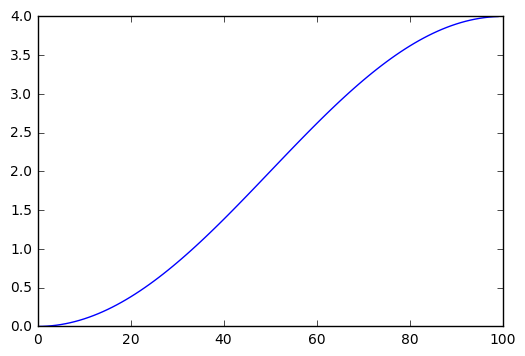

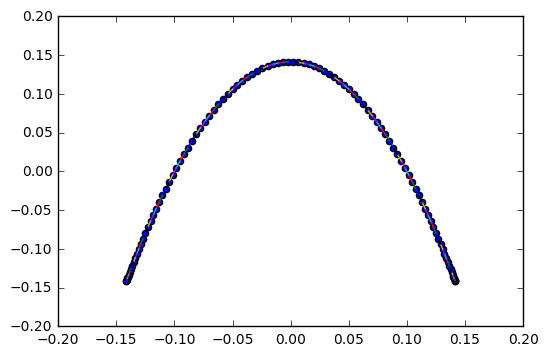

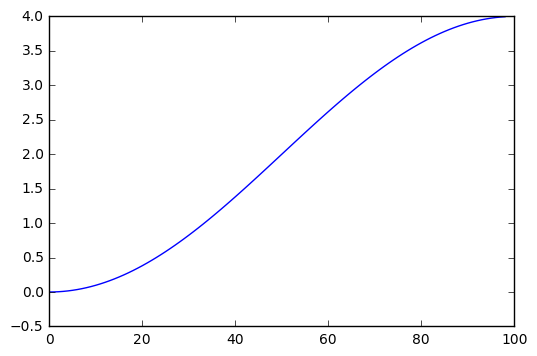

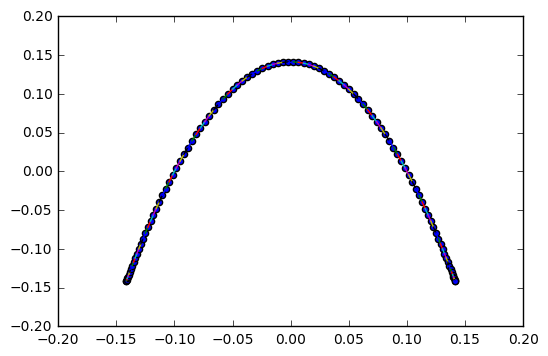

In [5]:
a_L = a.create_Lap()
a_L.plot_eigenvals()
a_L.plot_edge_eigenvecs(2,3)

a_S_L = a.create_sparse_Lap()
a_S_L.plot_eigenvals()
a_S_L.plot_edge_eigenvecs(2,3)

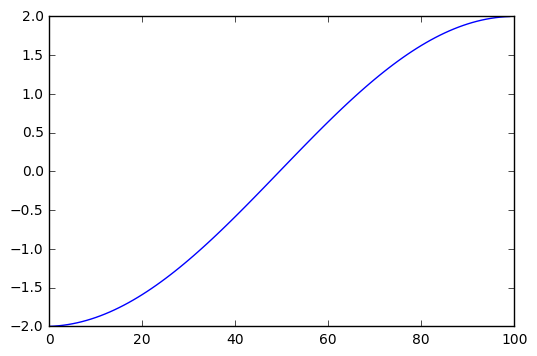

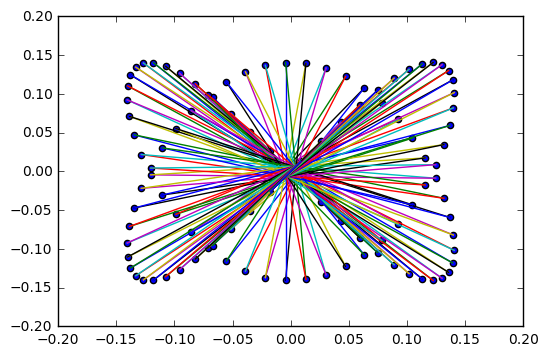

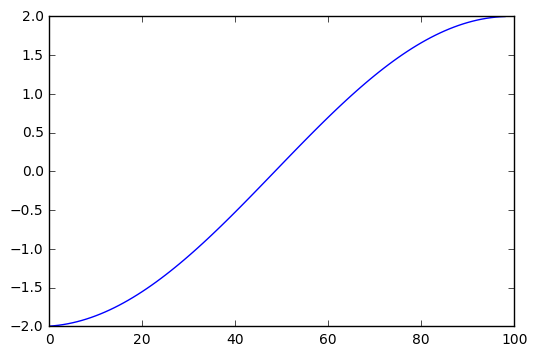

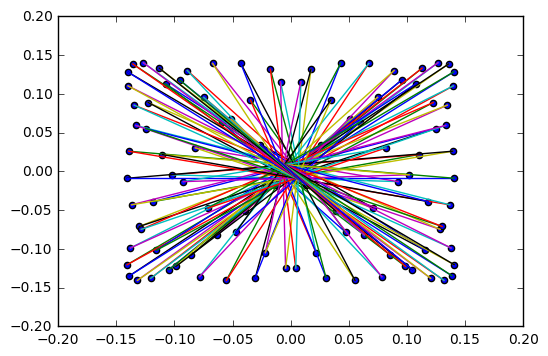

In [6]:
a.create_Adj()
a.Adj.plot_eigenvals()
a.Adj.plot_edge_eigenvecs(2,3)

a.create_sparse_Adj()
a.S_Adj.plot_eigenvals()
a.S_Adj.plot_edge_eigenvecs(2,3)